In [1]:
from abc import ABC, abstractmethod
from random import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
class CardABC(ABC):

    @abstractmethod
    def __repr__(self):
        pass
    
    @abstractmethod
    def value(self):
        pass



class DeckABC(ABC):

    @abstractmethod
    def create_deck(self):
        pass
    
    @abstractmethod
    def shuffle(self, deck):
        pass



class Card(CardABC):

    suits = {"♠", "♦", "♣", "♥"}
    ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"}

    def __init__(self, suit, rank):
        super().__init__()
        self.rank = rank
        self.suit = suit
        self.suits = []
        self.ranks = []
        
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def value(self):
        return None, None



class FaceCard(Card):

    # ranks = {"J", "Q", "K"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.soft = 10
        self.hard = 10
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)
    
    def value(self):
        return self.soft, self.hard



class AceCard(Card):

    # ranks = {"A"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.soft = 1
        self.hard = 11
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)

    def value(self):
        return self.soft, self.hard



class NumCard(Card):

    # ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.hard = int(self.rank)
        self.soft = int(self.rank)
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)

    def value(self):
        return self.soft, self.hard



class Deck(DeckABC):
    def __init__(self):
        super().__init__()
        self.deck = []
        self.create_deck()
        self.shuffle(deck=self.deck)

    def __len__(self):
        return len(self.deck)

    def deal(self):
        return self.deck.pop()

    def create_deck(self):
        suits = {"♠", "♦", "♣", "♥"}
        
        for suit in suits:
            for rank in range(2, 11):
                numCard = NumCard(suit, str(rank))
                self.deck.append((str(rank), suit, numCard))
            for rank in {"J", "Q", "K"}:
                faceCard = FaceCard(suit, rank)
                self.deck.append((rank, suit, faceCard))
            aceCard = AceCard(suit, "A")
            self.deck.append(("A", suit, aceCard))

    @staticmethod
    def shuffle(deck):
        shuffle(deck)



class Player(object):
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.hand = []
        self.win = None
        self.soft = None
        self.hard = None
    
    def __repr__(self):
        representation = self.name + ":  |  "
        for card in self.hand:
            representation += card[2].__repr__() + "  |  "    
        return representation

In [3]:
class Game():
    def __init__(self, deck):
        super().__init__()
        self.deck = deck
        self.dealer = Player("Dealer")
        self.user = Player("Player")
        self.result_user = 0
        self.result_dealer = 0

    def initial_deal(self):
        for i in range(2):
            self.dealer.hand.append(self.deck.pop())
            self.user.hand.append(self.deck.pop())
        self.dealer.soft, self.dealer.hard = self.check_hand(self.dealer.hand)
        self.user.soft, self.user.hard = self.check_hand(self.user.hand)

    def check_hand(self, hand):
        soft_sum = 0
        hard_sum = 0
        for h in hand:
            values = h[2].value()
            soft_sum += values[0]
            hard_sum += values[1]
        return [soft_sum, hard_sum]

    def ask_user(self, parameter):
        if self.user.soft <= parameter:
            self.user.hand.append(self.deck.pop())
            self.user.soft, self.user.hard = self.check_hand(self.user.hand)
            self.ask_user(parameter=parameter)
        else:
            if self.user.soft > 21:
                self.result_user = self.user.soft
            else:
                self.result_user = self.user.soft if self.user.hard > 21 else max(self.user.soft, self.user.hard)
                
    def ask_dealer(self):
        if self.dealer.soft <= 16:
            self.dealer.hand.append(self.deck.pop())
            self.dealer.soft, self.dealer.hard = self.check_hand(self.dealer.hand)
            self.ask_dealer()
        else:
            if self.dealer.soft > 21:
                self.result_dealer = self.dealer.soft
            else:
                self.result_dealer = self.dealer.soft if self.dealer.hard > 21 else max(self.dealer.soft, self.dealer.hard)

1. Write a function that takes an integer argument between 1 and 20 included, and simulates a game between the player and the dealer. If the sum of the player's cards is less than or equal the parameter, player takes another card, otherwise the player passes. The function returns the game result, one of the following

{

    0: "win_points", # player wins by points, ex. player 19 dealer 18
    
    1: "loss_points", # player loses by points, ex. player 17 dealer 18
    
    2: "win_bust", #player wins when dealer busts, ex. player 19 dealer 25
    
    3:"loss_bust" #player loses when player busts, ex. player 25 dealer 19
}

In [4]:
def simulate(parameter):
        dec = Deck()
        game = Game(dec.deck)
        game.initial_deal()
        game.ask_user(parameter=parameter)
        game.ask_dealer()
        
        if game.result_user > 21:
            return 3
        elif game.result_user < 21 and game.result_dealer > 21:
            return 2
        else:
            if game.result_user < game.result_dealer:
                return 1
            else:
                return 0

2. Simulate the game 10000 times for each parameter, and store the results in dictionary result_dict = {"param_1": [], "param_2": [], ...,  "param_20": []}, where the elements of the lists are the simulation results (0,1,2, or 3)

In [5]:
def main():
    result_dict = {}
    for i in range(1, 21):
        result_dict[f"param_{i}"] = [simulate(parameter=i) for j in range(0, 10000)]
    return result_dict

In [42]:
result_dict = main()

3. Create results_df pandas.DataFrame for result_dict

In [43]:
results_df = pd.DataFrame(data=result_dict)

In [44]:
df_cat = CategoricalDtype(categories=[0, 1, 2, 3])
results_df = results_df.astype(df_cat)

In [45]:
results_df["param_1"]

0       1
1       2
2       2
3       1
4       1
       ..
9995    1
9996    2
9997    1
9998    2
9999    1
Name: param_1, Length: 10000, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [46]:
results_df.head(10)

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11,param_12,param_13,param_14,param_15,param_16,param_17,param_18,param_19,param_20
0,1,1,2,1,2,1,0,1,1,1,1,0,1,2,1,2,0,3,3,3
1,2,1,1,1,1,1,2,2,1,1,1,0,1,1,1,2,3,0,3,3
2,2,1,2,1,0,1,0,1,2,0,0,2,3,1,2,1,1,1,3,3
3,1,1,1,0,1,1,2,0,2,1,0,2,0,3,2,3,0,0,3,3
4,1,1,1,2,2,1,1,1,2,1,1,1,1,0,1,0,3,3,3,3
5,2,2,1,1,1,2,1,2,1,0,2,1,3,1,3,2,3,3,0,3
6,1,0,2,1,1,1,2,0,2,0,0,1,2,1,0,2,3,3,3,3
7,1,1,1,2,2,1,0,0,1,1,1,1,1,1,1,2,3,2,3,3
8,1,2,1,2,1,1,1,0,2,0,1,2,0,1,1,1,3,2,3,3
9,1,0,0,0,1,0,1,1,0,0,2,2,0,2,0,3,3,0,2,3


In [47]:
for i in range(20):
    print(results_df[f"param_{i+1}"].value_counts().sort_index(ascending = True).to_frame(), "\n")

   param_1
0     1437
1     5577
2     2986
3        0 

   param_2
0     1480
1     5470
2     3050
3        0 

   param_3
0     1459
1     5542
2     2999
3        0 

   param_4
0     1537
1     5483
2     2980
3        0 

   param_5
0     1567
1     5408
2     3025
3        0 

   param_6
0     1569
1     5382
2     3049
3        0 

   param_7
0     1644
1     5344
2     3012
3        0 

   param_8
0     1623
1     5376
2     3001
3        0 

   param_9
0     1639
1     5382
2     2979
3        0 

   param_10
0      1768
1      5286
2      2946
3         0 

   param_11
0      1816
1      5161
2      3023
3         0 

   param_12
0      1955
1      4753
2      2903
3       389 

   param_13
0      2184
1      4212
2      2676
3       928 

   param_14
0      2348
1      3713
2      2470
3      1469 

   param_15
0      2606
1      2984
2      2171
3      2239 

   param_16
0      2804
1      2202
2      1855
3      3139 

   param_17
0      2782
1      1520
2      1441
3    

4. Compute the relative frequency of wins and losses by bust for each parameter

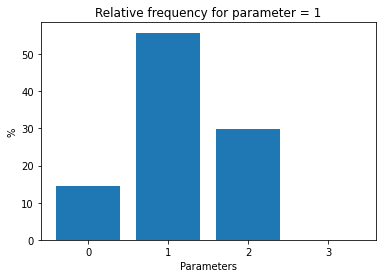

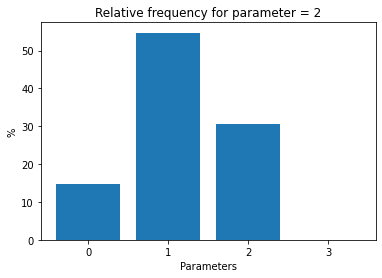

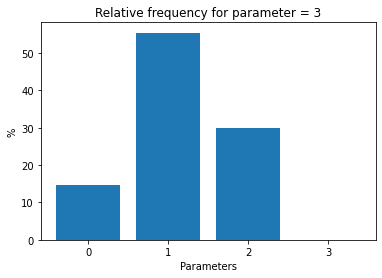

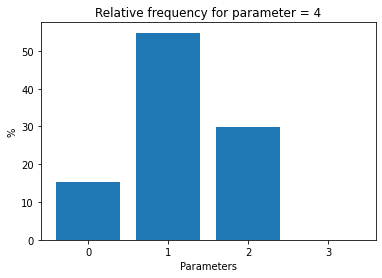

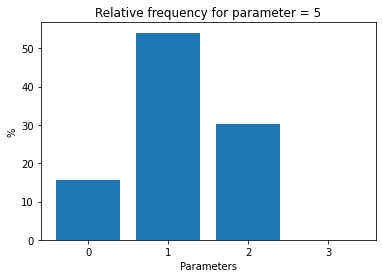

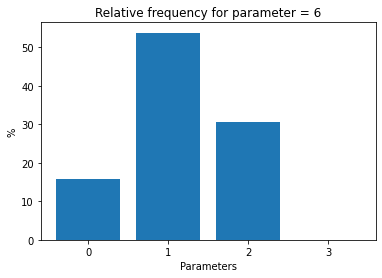

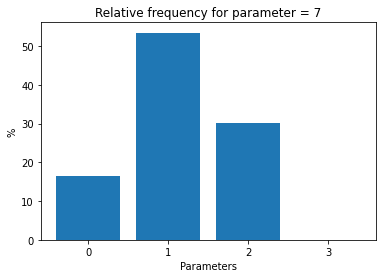

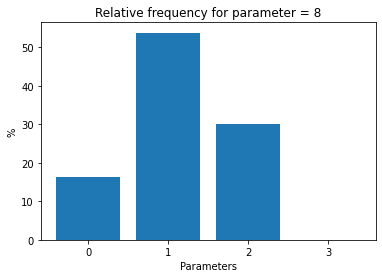

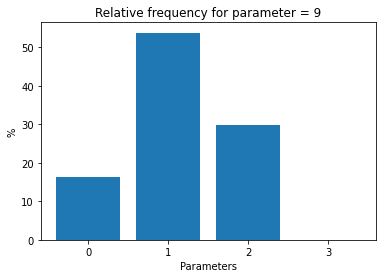

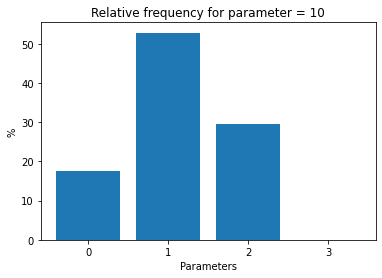

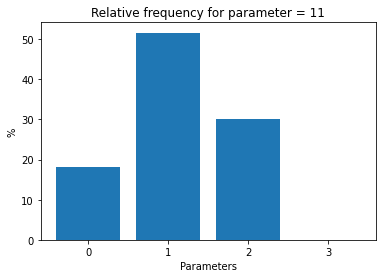

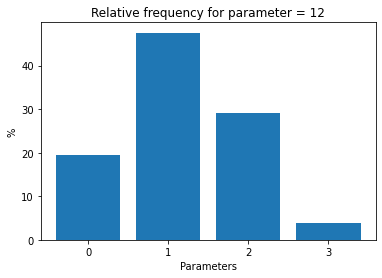

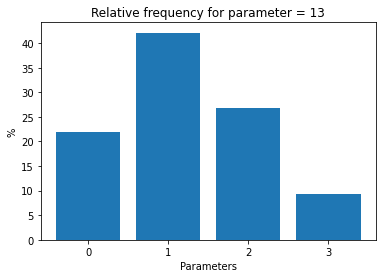

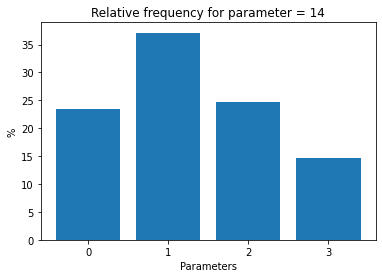

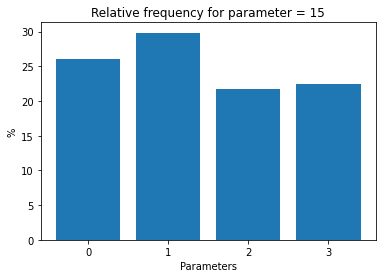

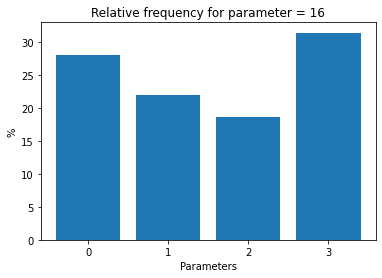

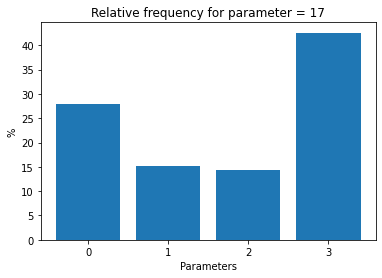

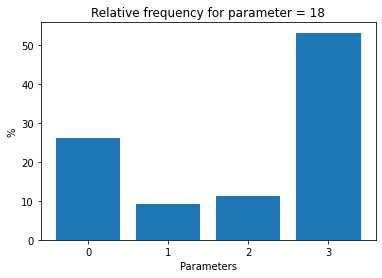

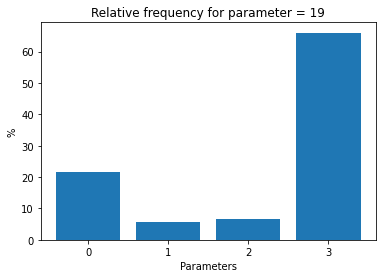

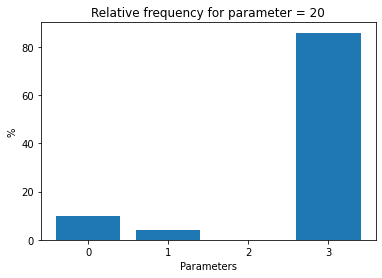

In [106]:
for i in range(20):
    rel_fr = results_df[f"param_{i+1}"].value_counts().sort_index(ascending = True) / len(results_df)
    cat = results_df["param_1"].cat.categories
    plt.bar(cat, rel_fr*100)
    plt.ylabel('%')
    plt.xlabel('Parameters')
    plt.title(f'Relative frequency for parameter = {i+1}')
    plt.xticks(cat, rel_fr.index)
    plt.show();

In [49]:
results_df.shape

(10000, 20)

In [86]:
data = { "0: win_point": [], "1: loss_point":[], "2: win_bust":[], "3: loss_bust":[]}
    
for i in range(20):
    a = results_df[f"param_{i+1}"].value_counts().sort_index(ascending = True)
    
    data["0: win_point"].append(a[0])
    data["1: loss_point"].append(a[1])
    data["2: win_bust"].append(a[2])
    data["3: loss_bust"].append(a[3])

In [87]:
results_df_2 = pd.DataFrame(data = data)

In [88]:
results_df_2 = results_df_2.rename(index=lambda s: f"param_{s + 1}")

In [89]:
results_df_2

,0: win_point,1: loss_point,2: win_bust,3: loss_bust
param_1,1437,5577,2986,0
param_2,1480,5470,3050,0
param_3,1459,5542,2999,0
param_4,1537,5483,2980,0
param_5,1567,5408,3025,0
param_6,1569,5382,3049,0
param_7,1644,5344,3012,0
param_8,1623,5376,3001,0
param_9,1639,5382,2979,0
param_10,1768,5286,2946,0


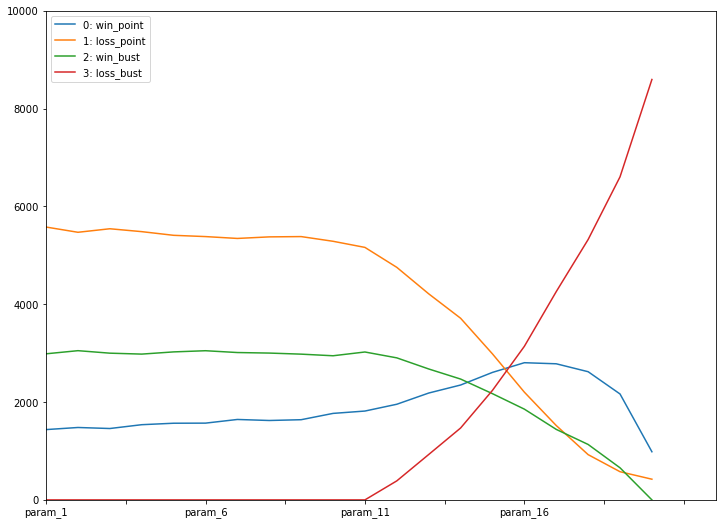

In [90]:
results_df_2.plot(kind="line", xlim =(0,21), ylim=(0,10000), figsize = (12, 9));

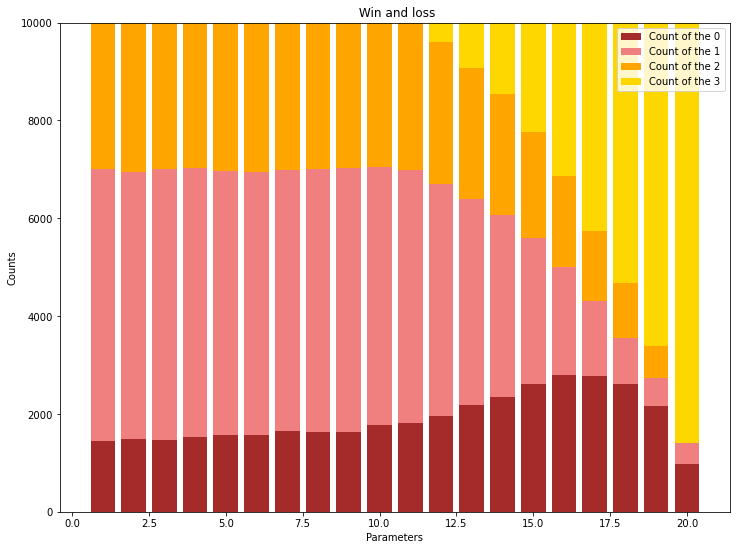

In [91]:
x = [i for i in range(1,21)]

plt.figure(figsize =(12, 9))

y1 = results_df_2["0: win_point"]
y2 = results_df_2["1: loss_point"]
y3 = results_df_2["2: win_bust"]
y4 = results_df_2["3: loss_bust"]

plt.bar(x, y1, color='brown')
plt.bar(x, y2, bottom=y1, color='lightcoral')
plt.bar(x, y3, bottom=y1+y2, color='orange')
plt.bar(x, y4, bottom=y1+y2+y3, color='gold')
plt.xlabel("Parameters")
plt.ylabel("Counts")
plt.legend(["Count of the 0", "Count of the 1", "Count of the 2", "Count of the 3"])
plt.title(" Win and loss")
plt.show();

In [92]:
results_df_2["count_win"] = results_df_2["0: win_point"] + results_df_2["2: win_bust"]
results_df_2["count_loss"] = results_df_2["1: loss_point"] + results_df_2["3: loss_bust"]

In [93]:
results_df_2

,0: win_point,1: loss_point,2: win_bust,3: loss_bust,count_win,count_loss
param_1,1437,5577,2986,0,4423,5577
param_2,1480,5470,3050,0,4530,5470
param_3,1459,5542,2999,0,4458,5542
param_4,1537,5483,2980,0,4517,5483
param_5,1567,5408,3025,0,4592,5408
param_6,1569,5382,3049,0,4618,5382
param_7,1644,5344,3012,0,4656,5344
param_8,1623,5376,3001,0,4624,5376
param_9,1639,5382,2979,0,4618,5382
param_10,1768,5286,2946,0,4714,5286


In [94]:
print("max_win_count = ", results_df_2["count_win"].max())
print("min_win_count = ", results_df_2["count_win"].min())
print("max_loss_count = ", results_df_2["count_loss"].max())
print("min_loss_count = ", results_df_2["count_loss"].min())

max_win_count =  4860
min_win_count =  984
max_loss_count =  9016
min_loss_count =  5140


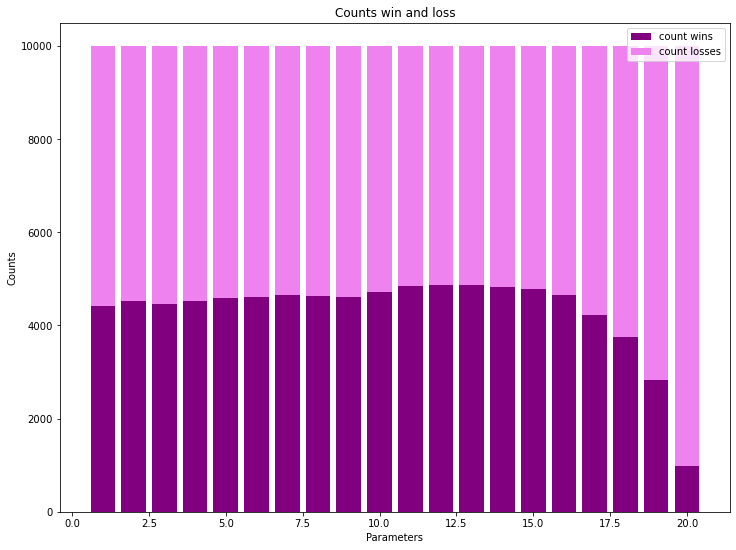

In [95]:
plt.figure(figsize =(12, 9))

y1 = results_df_2["count_win"]
y2 = results_df_2["count_loss"]

plt.bar(x, y1, color='purple')
plt.bar(x, y2, bottom=y1, color='violet')
plt.xlabel("Parameters")
plt.ylabel("Counts")
plt.legend(["count wins", "count losses"])
plt.title("Counts win and loss")
plt.show();

Ինչպես երևում է գրաֆիկից ամենաշատ թվով հաղթանակները գրանցվել է, երբ մեր պարամետրի արժեքը 13 է եղել, թվով 4860 հաղթանակ։

Իսկ ամենաշատ թվով պարտությունները եղել է պարամետրի 20  արժեքի ժամանակ, թվով 9016 պարտություն։

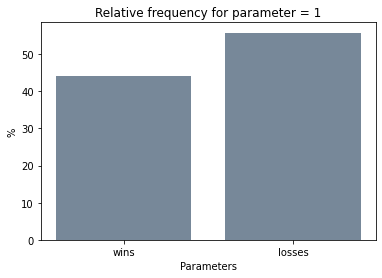

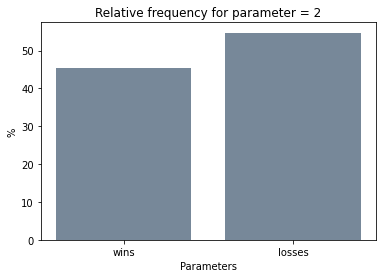

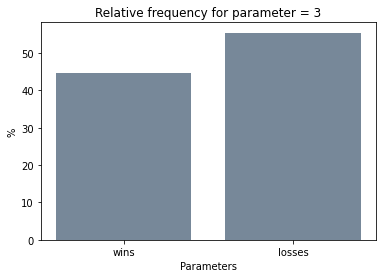

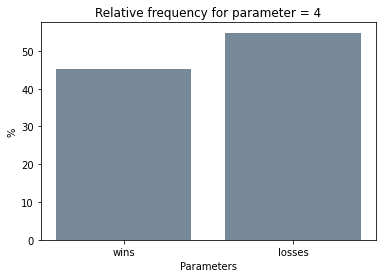

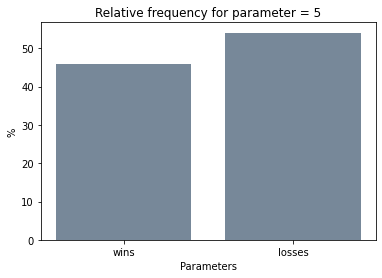

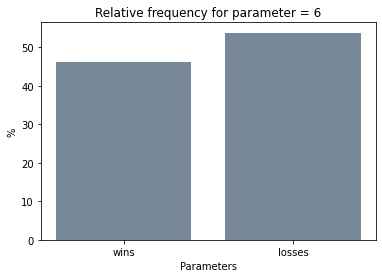

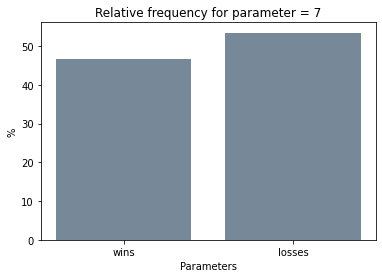

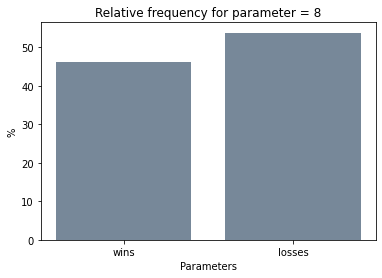

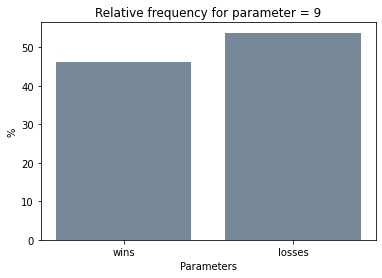

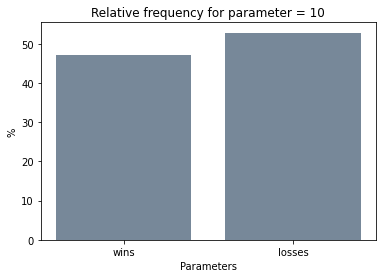

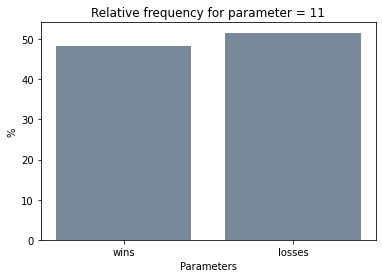

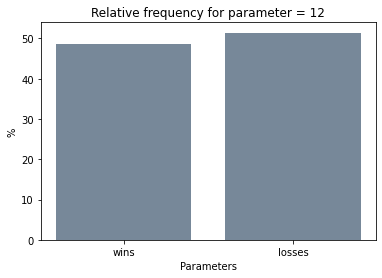

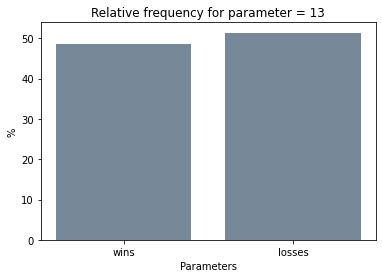

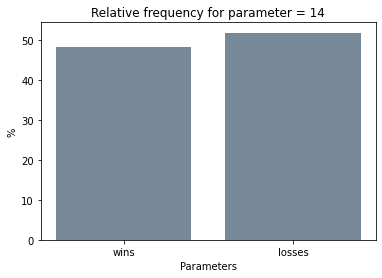

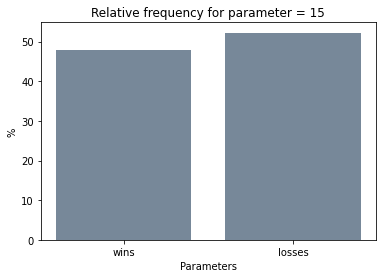

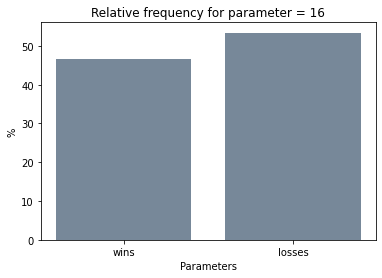

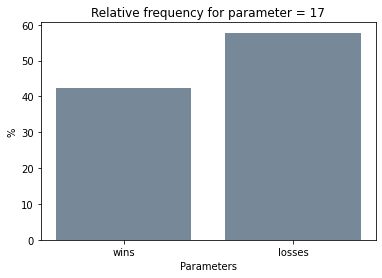

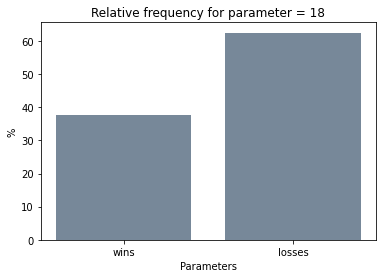

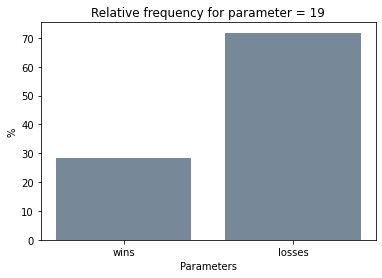

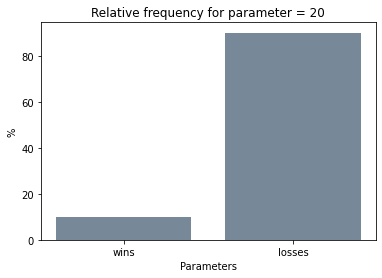

In [105]:
for i in range(20):
    rel_fr = [(results_df_2["count_win"][i]/ len(results_df))*100, (results_df_2["count_loss"][i]/ len(results_df))*100]
    cat = ["wins", "losses"]
    plt.bar(cat, rel_fr, color = "lightslategray")
    plt.ylabel('%')
    plt.xlabel('Parameters')
    plt.title(f'Relative frequency for parameter = {i+1}')
    plt.show();

5. Visualize the results (optional, additional points)

In [97]:
def wins_probability(arr):
    win_count = 0
    wins = []
    for i in range(1, len(arr) + 1):
        if arr[i-1] == 0 or arr[i-1] == 2:
            win_count +=1
        wins.append(win_count/i)
    return wins

In [98]:
x = [i+1 for i in range(10000)]

In [99]:
y = {}
for i in range(20):
    y[i+1] = wins_probability(results_df[f"param_{i+1}"])  

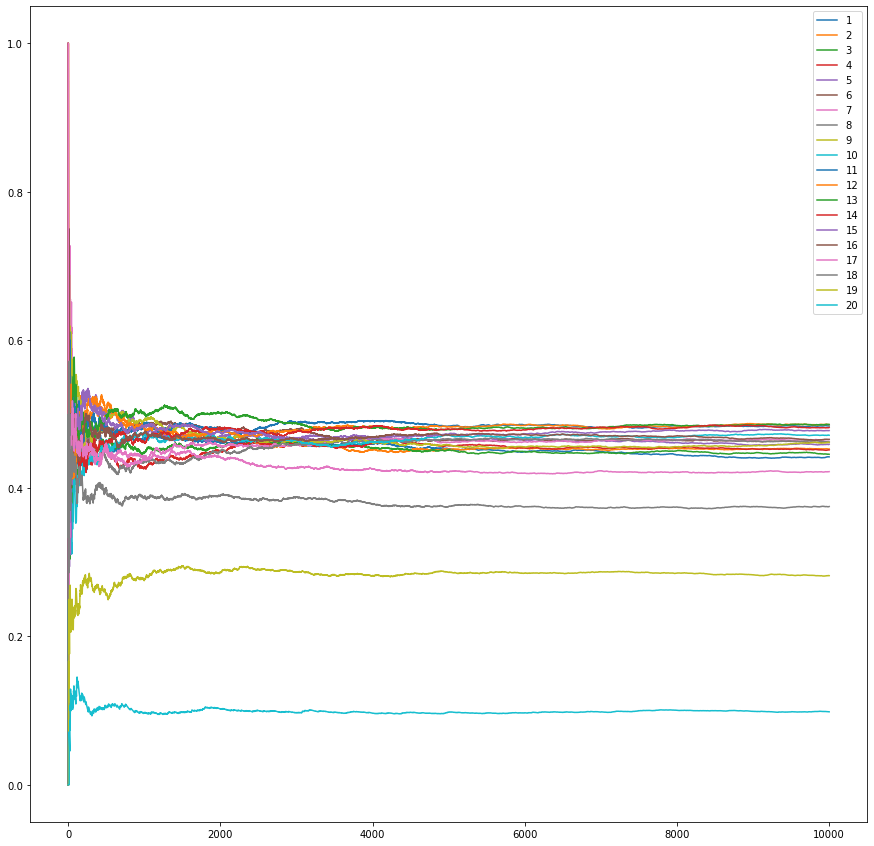

In [100]:
prob_df = pd.DataFrame(data=y)

fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
prob_df.plot(ax=ax)
plt.show();

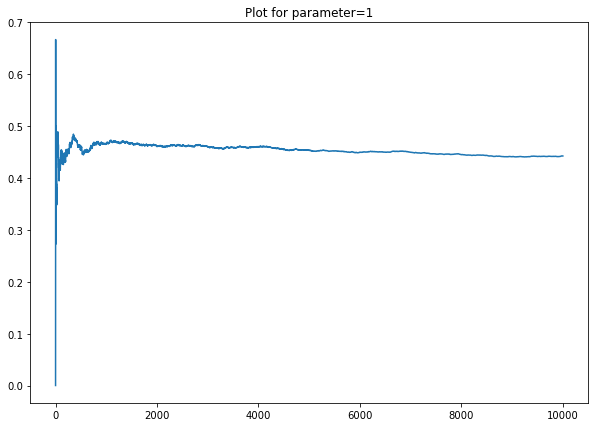

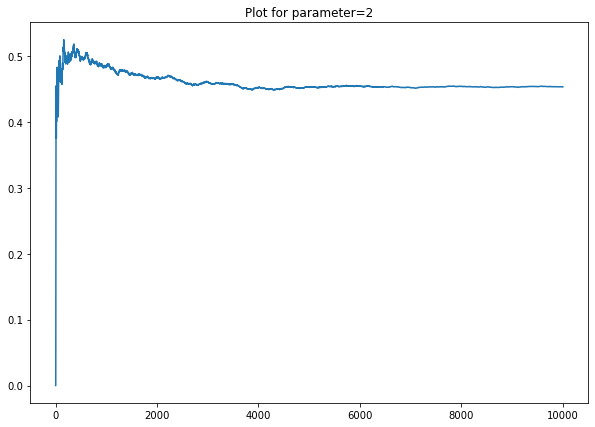

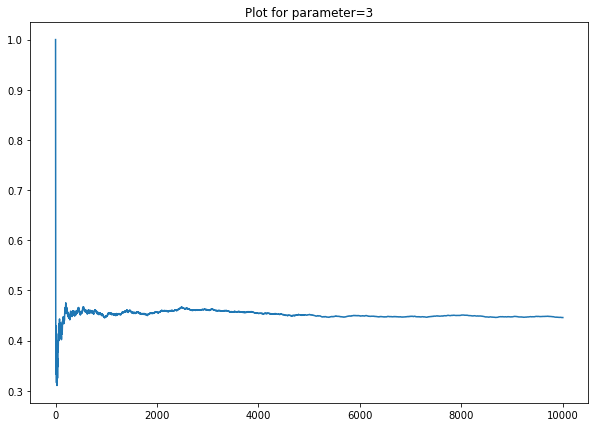

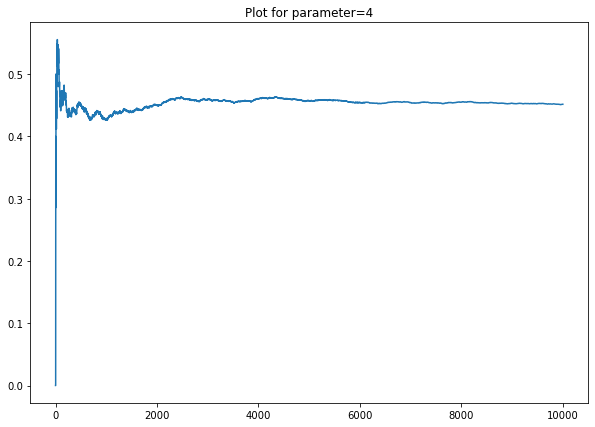

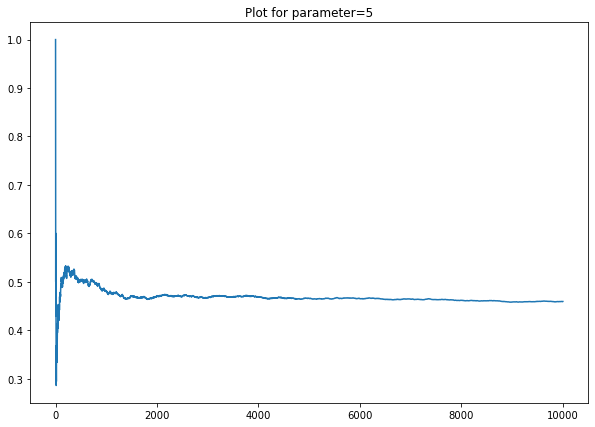

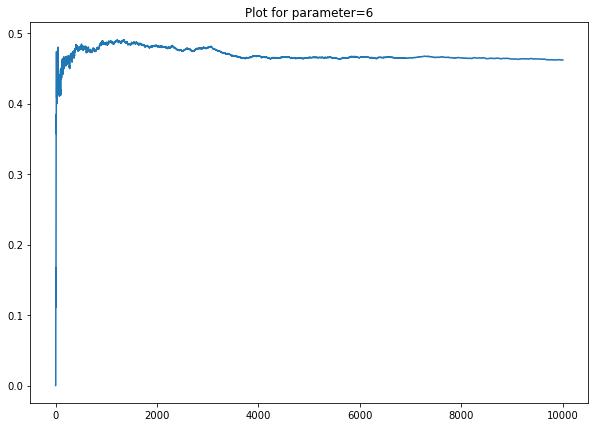

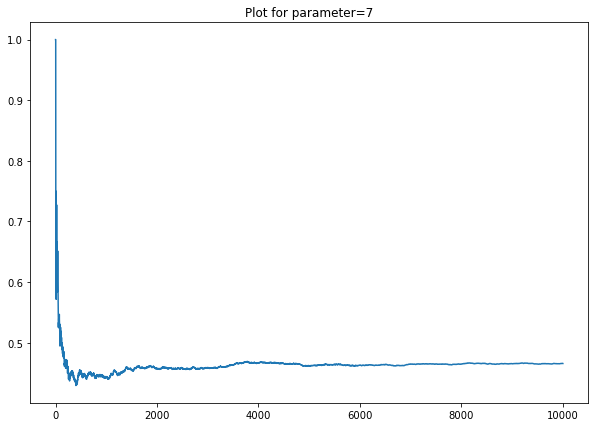

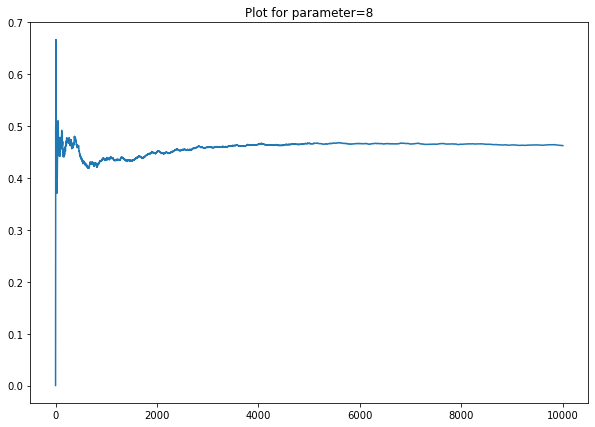

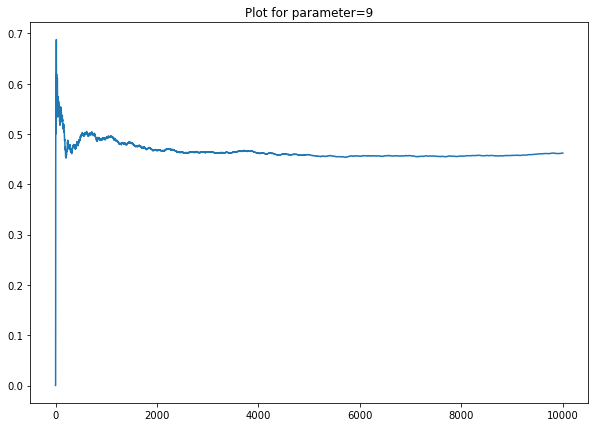

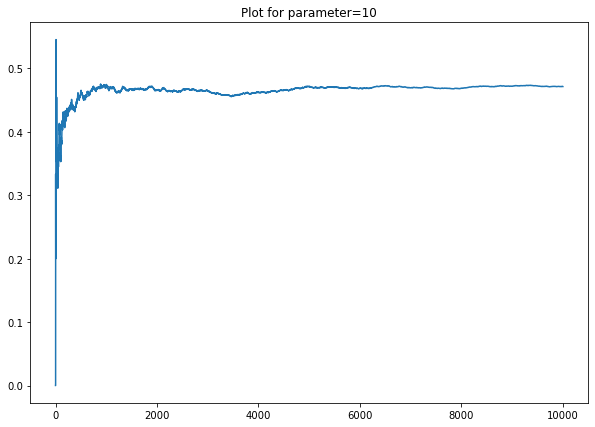

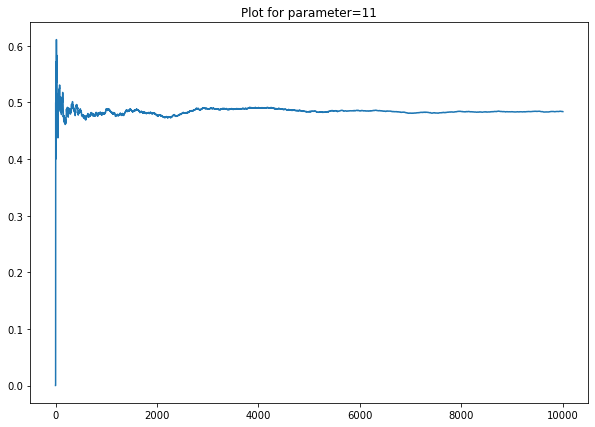

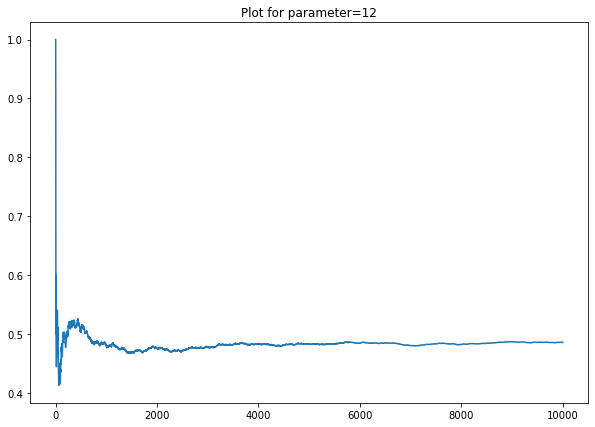

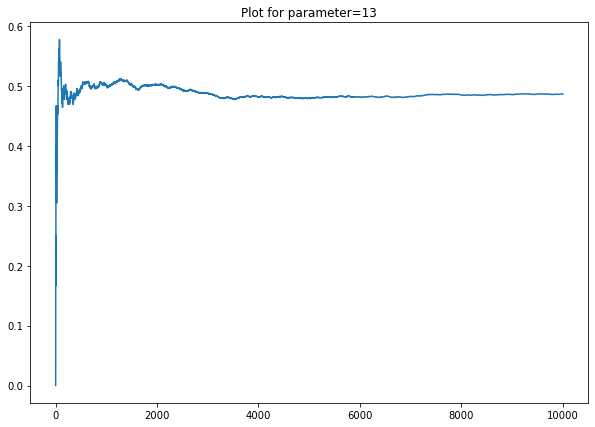

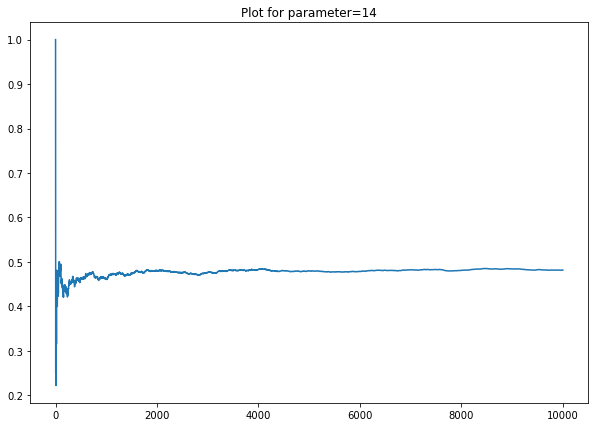

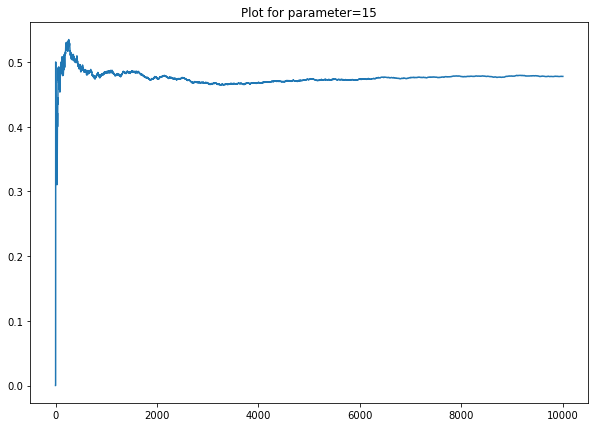

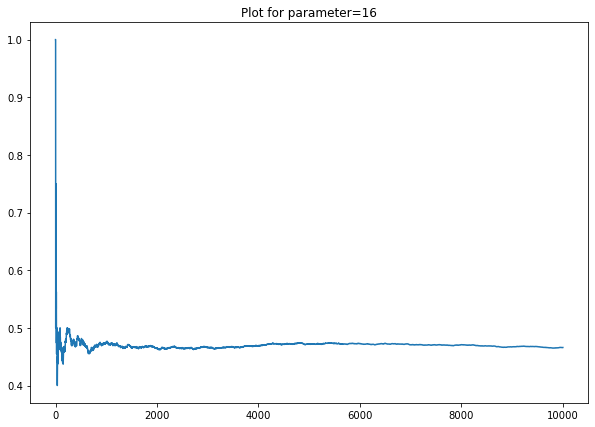

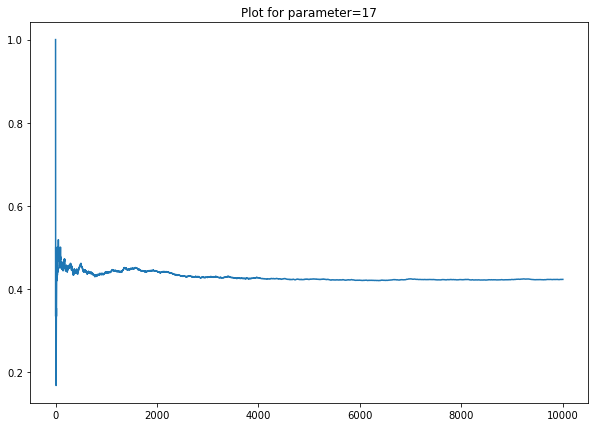

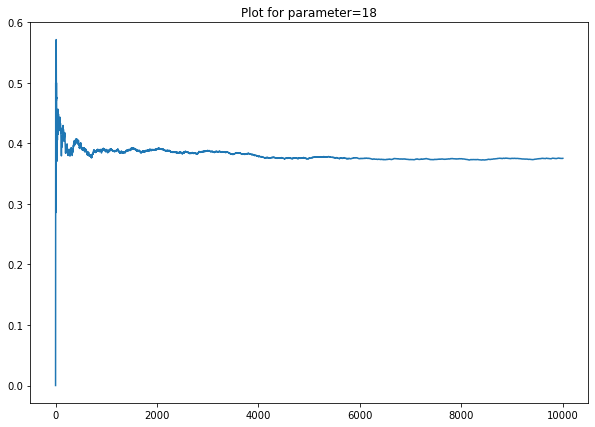

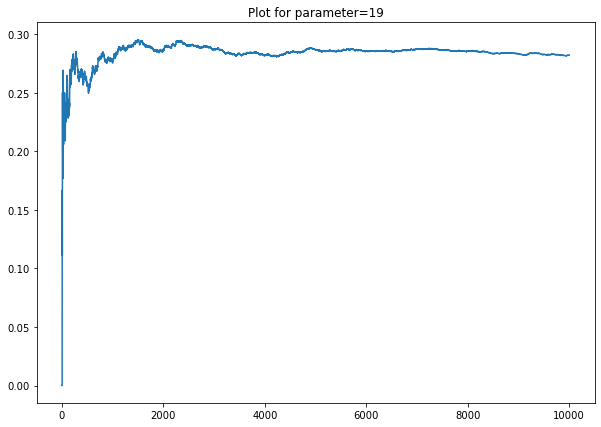

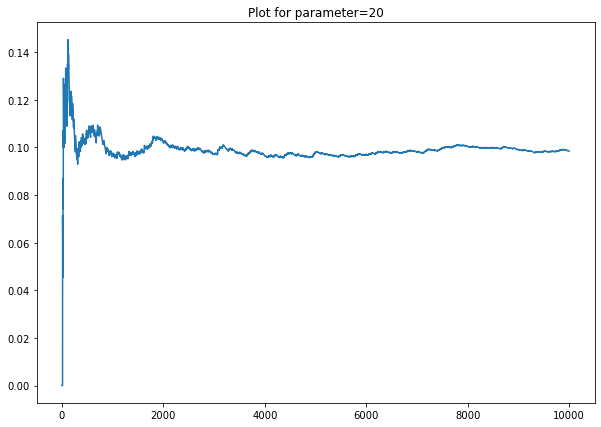

In [101]:
for i in range(20):
    plt.figure(figsize = (10,7))
    plt.plot(x, y[i+1])
    plt.title(f"Plot for parameter={i+1}")
    plt.show();